# Pre Vs. Post 5G Performance Insights and KPI Analysis

- Domain: Telecom
- Function: Executive Management

## Understanding the Business Persona

After launching 5G in May 2022, the company saw a drop in active users and slower revenue growth. Management wants to compare key metrics from before and after the 5G launch to understand what went wrong. They aim to find insights and improve their internet plans to bring back users and boost growth.

## Project Goals

- Compare KPIs before and after the 5G launch to measure performance changes.
- Identify reasons behind the drop in active users and revenue growth.
- Uncover trends and patterns in user behavior post-5G launch.
- Evaluate the effectiveness of current internet plans.
- Suggest data-driven strategies to recover user engagement and improve revenue.

### Table Schema
![Table Schema](Data_Model.png)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
dim_date = pd.read_csv('dim_date.csv')
dim_date.head(3)

,date,month_name,before/after_5g,time_period
0,01-Jan-22,Jan,Before 5G,1
1,01-Feb-22,Feb,Before 5G,2
2,01-Mar-22,Mar,Before 5G,3


In [3]:
dim_plan = pd.read_csv('dim_plan.csv',header=1)
dim_plan.head(3)

,plan,plan_description
0,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
1,p2,Super Saviour Pack (1.5 GB / Day Combo For 56 ...
2,p3,Elite saver Pack (1 GB/ Day) Valid: 28 Days


In [4]:
dim_cities = pd.read_csv('dim_cities.csv')
dim_cities.head(3)

,city_code,city_name
0,400001,Mumbai
1,110001,Delhi
2,700001,Kolkata


In [5]:
fact_atliqo_metrics = pd.read_csv('fact_atliqo_metrics.csv')
fact_atliqo_metrics.head(3)

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs
0,01-Jan-22,400001,Atliqo,60.69,192,31.61,1.90
1,01-Jan-22,110001,Atliqo,42.71,175,24.41,1.31
2,01-Jan-22,700001,Atliqo,36.91,175,21.09,1.25


In [6]:
fact_market_share = pd.read_csv('fact_market_share.csv')
fact_market_share.head(3)

,date,city_code,tmv_city_crores,company,ms_pct
0,01-Jan-22,400001,286.29,Atliqo,21.20
1,01-Jan-22,110001,241.59,Atliqo,17.68
2,01-Jan-22,700001,222.19,Atliqo,16.61


In [7]:
fact_plan_revenue = pd.read_csv('fact_plan_revenue.csv')
fact_plan_revenue.head(3)

,date,city_code,plans,plan_revenue_crores
0,01-Jan-22,400001,p1,6.26
1,01-Jan-22,110001,p1,4.58
2,01-Jan-22,700001,p1,4.29


### Understand the Data

#### Shape

In [8]:
dataframes = [dim_date, dim_plan, dim_cities, fact_atliqo_metrics, fact_market_share, fact_plan_revenue]
names = ['dim_date', 'dim_plan', 'dim_cities', 'fact_atliqo_metrics', 'fact_market_share', 'fact_plan_revenue']

for name, df in zip(names, dataframes):
    print(f"{name} : {df.shape}")
    print("-" * 30)

dim_date : (8, 4)
------------------------------
dim_plan : (13, 2)
------------------------------
dim_cities : (15, 2)
------------------------------
fact_atliqo_metrics : (120, 7)
------------------------------
fact_market_share : (600, 5)
------------------------------
fact_plan_revenue : (1200, 4)
------------------------------


#### Data Types

In [9]:
for name, df in zip(names, dataframes):
    print(f"{name} :")
    print(df.dtypes)
    print("-" * 30)

dim_date :
date               object
month_name         object
before/after_5g    object
time_period         int64
dtype: object
------------------------------
dim_plan :
plan                object
plan_description    object
dtype: object
------------------------------
dim_cities :
city_code     int64
city_name    object
dtype: object
------------------------------
fact_atliqo_metrics :
date                         object
city_code                     int64
company                      object
atliqo_revenue_crores       float64
arpu                          int64
active_users_lakhs          float64
unsubscribed_users_lakhs    float64
dtype: object
------------------------------
fact_market_share :
date                object
city_code            int64
tmv_city_crores    float64
company             object
ms_pct             float64
dtype: object
------------------------------
fact_plan_revenue :
date                    object
city_code                int64
plans                   object


#### Missing Values

In [10]:
for name, df in zip(names, dataframes):
    print(f"{name} :")
    print(df.isnull().sum())
    print("-" * 30)

dim_date :
date               0
month_name         0
before/after_5g    0
time_period        0
dtype: int64
------------------------------
dim_plan :
plan                0
plan_description    0
dtype: int64
------------------------------
dim_cities :
city_code    0
city_name    0
dtype: int64
------------------------------
fact_atliqo_metrics :
date                        0
city_code                   0
company                     0
atliqo_revenue_crores       0
arpu                        0
active_users_lakhs          0
unsubscribed_users_lakhs    0
dtype: int64
------------------------------
fact_market_share :
date               0
city_code          0
tmv_city_crores    0
company            0
ms_pct             0
dtype: int64
------------------------------
fact_plan_revenue :
date                   0
city_code              0
plans                  0
plan_revenue_crores    0
dtype: int64
------------------------------


In [11]:
dataframes = [dim_date, fact_atliqo_metrics, fact_market_share, fact_plan_revenue]
names = ['dim_date', 'fact_atliqo_metrics', 'fact_market_share', 'fact_plan_revenue']

for name, df in zip(names, dataframes):
    # Convert 'date' column to datetime if it exists
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("Object columns converted to Date Time ✅")

Object columns converted to Date Time ✅


In [12]:
for name, df in zip(names, dataframes):
    # Convert object columns to category
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')
    
print("Object columns converted to Category ✅")

Object columns converted to Category ✅


In [13]:
# cheack data type of date column
for name, df in zip(names, dataframes):
    print(f"{name} :")
    print(df.dtypes)
    print("-" * 30)

dim_date :
date               datetime64[ns]
month_name               category
before/after_5g          category
time_period                 int64
dtype: object
------------------------------
fact_atliqo_metrics :
date                        datetime64[ns]
city_code                            int64
company                           category
atliqo_revenue_crores              float64
arpu                                 int64
active_users_lakhs                 float64
unsubscribed_users_lakhs           float64
dtype: object
------------------------------
fact_market_share :
date               datetime64[ns]
city_code                   int64
tmv_city_crores           float64
company                  category
ms_pct                    float64
dtype: object
------------------------------
fact_plan_revenue :
date                   datetime64[ns]
city_code                       int64
plans                        category
plan_revenue_crores           float64
dtype: object
-------------------

#### How does the total revenue, ARPU, and active user count vary month-over-month for Atliqo?

In [14]:
# Merge with dim_date for month names (optional)
fact_atliqo_metrics_merged = fact_atliqo_metrics.merge(dim_date, on='date', how='left')

# Group by month name or date to get totals/averages
monthly_metrics = fact_atliqo_metrics_merged.groupby('date').agg({
    'atliqo_revenue_crores': 'sum',
    'arpu': 'mean',
    'active_users_lakhs': 'sum'
}).reset_index()

# Sort by date for line plot
monthly_metrics = monthly_metrics.sort_values('date')

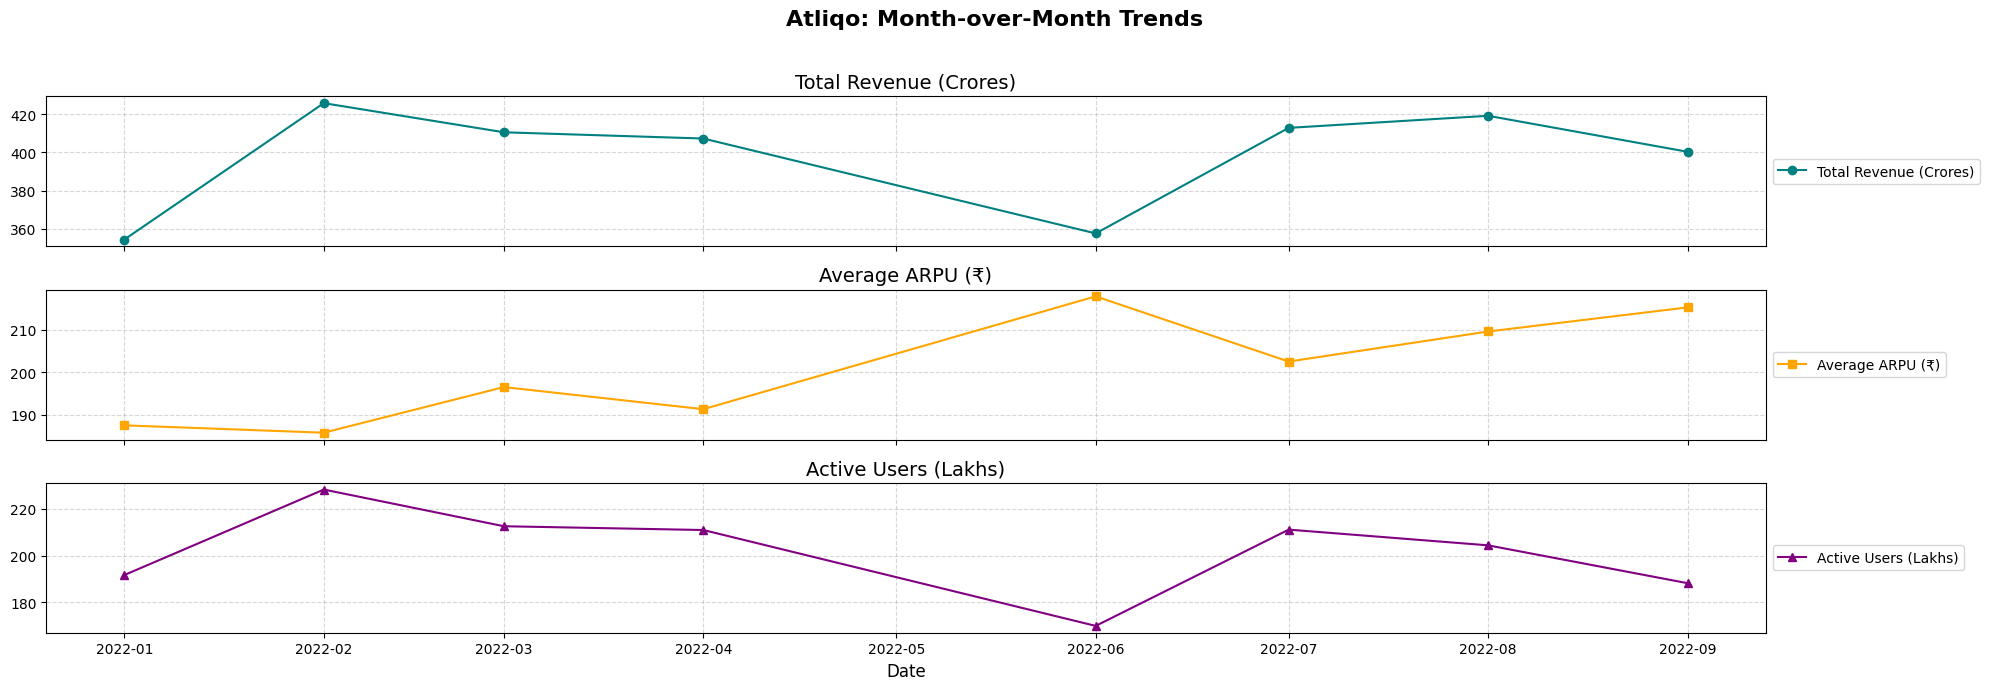

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 7), sharex=True)

# Plot on each axis separately
ax[0].plot(monthly_metrics['date'], monthly_metrics['atliqo_revenue_crores'],
           marker='o', color='teal', label='Total Revenue (Crores)')
ax[0].set_title('Total Revenue (Crores)', fontsize=14)
ax[0].grid(True, linestyle='--', alpha=0.5)
ax[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax[1].plot(monthly_metrics['date'], monthly_metrics['arpu'],
           marker='s', color='orange', label='Average ARPU (₹)')
ax[1].set_title('Average ARPU (₹)', fontsize=14)
ax[1].grid(True, linestyle='--', alpha=0.5)
ax[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax[2].plot(monthly_metrics['date'], monthly_metrics['active_users_lakhs'],
           marker='^', color='purple', label='Active Users (Lakhs)')
ax[2].set_title('Active Users (Lakhs)', fontsize=14)
ax[2].set_xlabel('Date', fontsize=12)
ax[2].grid(True, linestyle='--', alpha=0.5)
ax[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax[2].tick_params(axis='x', rotation=0 )

fig.suptitle('Atliqo: Month-over-Month Trends', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  

plt.show()

#### What is the unsubscribed users across different cities and months?

In [16]:
fact_atliqo_metrics_merged = fact_atliqo_metrics.merge(dim_cities,on='city_code' , how='left') \
                                                .merge(dim_date, on='date', how='left')

fact_atliqo_metrics_merged  = fact_atliqo_metrics_merged[['date','city_name','unsubscribed_users_lakhs']]

fact_atliqo_metrics_merged['year_month'] = fact_atliqo_metrics_merged['date']\
                                                    .dt.to_period('M').astype(str)

unsub_trend = fact_atliqo_metrics_merged.groupby(['year_month', 'city_name'])['unsubscribed_users_lakhs'].sum().reset_index()

unsub_pivot = unsub_trend.pivot(index='year_month', 
                                columns='city_name', 
                                values='unsubscribed_users_lakhs')

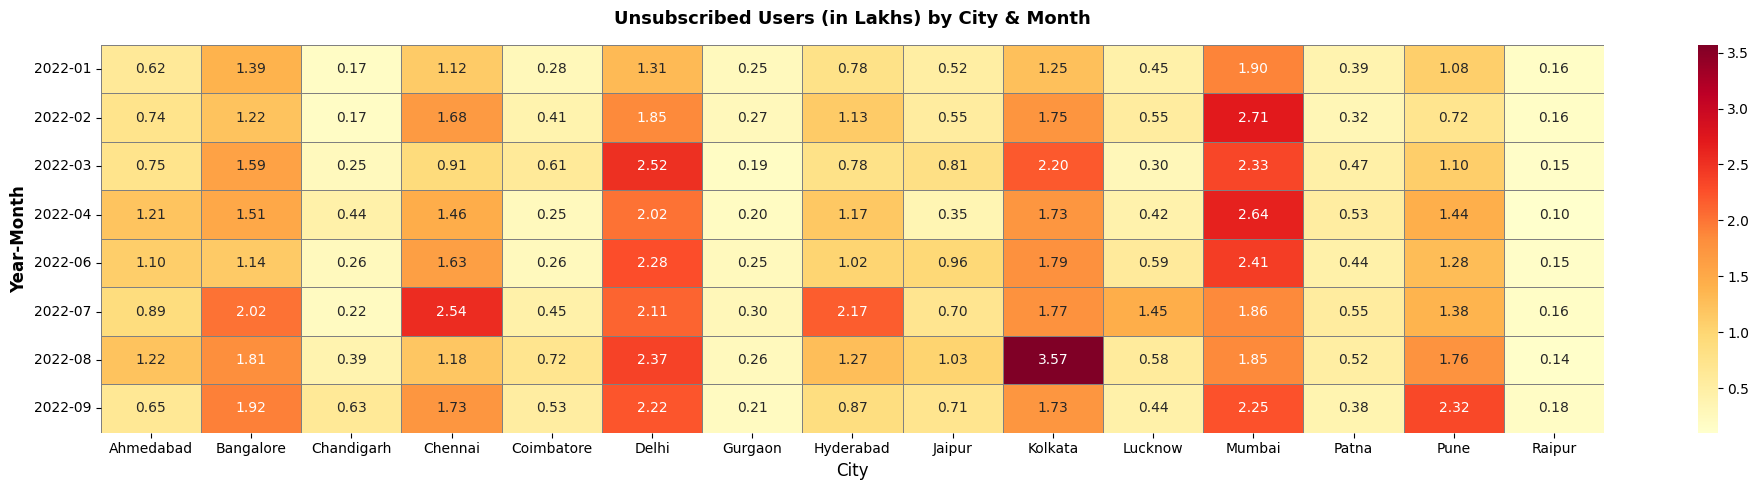

In [17]:
plt.figure(figsize=(20, 5))
sns.heatmap(unsub_pivot, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5, linecolor='gray')

plt.title("Unsubscribed Users (in Lakhs) by City & Month", fontsize=13, weight='bold', pad=15)
plt.xlabel("City", fontsize=12)
plt.ylabel("Year-Month", fontsize=12 , weight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Which cities have the highest and lowest ARPU for Atliqo?

In [18]:
arpu_city = fact_atliqo_metrics.merge(dim_cities, on='city_code')

arpu_top = arpu_city.groupby('city_name')['arpu'].mean().sort_values(ascending=False)
arpu_buttom = arpu_city.groupby('city_name')['arpu'].mean().sort_values()

print("🏙️ Top 5 Cities with Highest ARPU:")
display(arpu_top.head(5))

print("\n🏚️ Bottom 5 Cities with Lowest ARPU:")
display(arpu_buttom.head(5))

🏙️ Top 5 Cities with Highest ARPU:


city_name
Mumbai        213.875
Patna         212.000
Lucknow       211.375
Coimbatore    208.250
Hyderabad     206.875
Name: arpu, dtype: float64


🏚️ Bottom 5 Cities with Lowest ARPU:


city_name
Pune          187.125
Kolkata       188.375
Chandigarh    191.625
Bangalore     191.875
Ahmedabad     195.500
Name: arpu, dtype: float64

#### How does ARPU change before and after 5G implementation

In [19]:
after_before = fact_atliqo_metrics.merge(dim_date, on='date')[['before/after_5g', 'arpu']]
after_before = after_before.groupby('before/after_5g')['arpu'].mean().reset_index()
print("ARPU change before and after 5G implementation:")
after_before

ARPU change before and after 5G implementation:


,before/after_5g,arpu
0,After 5G,211.250000
1,Before 5G,190.233333


#### Is there any correlation between active users and revenue?

In [20]:
correlation = fact_atliqo_metrics[['active_users_lakhs', 'atliqo_revenue_crores']].corr()

print(" Correlation Matrix:")
display(correlation)

print(f"\n Correlation between Active Users and Revenue: {correlation.loc['active_users_lakhs', 'atliqo_revenue_crores']:.3f}")

 Correlation Matrix:


,active_users_lakhs,atliqo_revenue_crores
active_users_lakhs,1.000000,0.979414
atliqo_revenue_crores,0.979414,1.000000



 Correlation between Active Users and Revenue: 0.979


#### What’s the average churn (unsubscribed users %) per city?

In [21]:
fact_atliqo_metrics['churn_pct'] = (
    fact_atliqo_metrics['unsubscribed_users_lakhs'] /
    fact_atliqo_metrics['active_users_lakhs']
) * 100

churn_city = fact_atliqo_metrics.merge(dim_cities, on='city_code')


top_avg_churn_by_city = churn_city.groupby('city_name')['churn_pct'].mean().sort_values(ascending=False)
buttom_avg_churn_by_city = churn_city.groupby('city_name')['churn_pct'].mean().sort_values()

print("\n Top 5 Cities with Highest Average Churn:")
display(top_avg_churn_by_city.head(5))

print("\n Top 5 Cities with Lowest Average Churn:")
display(buttom_avg_churn_by_city.head(5))



 Top 5 Cities with Highest Average Churn:


city_name
Delhi         8.576936
Chennai       8.331225
Jaipur        8.119143
Coimbatore    7.943822
Pune          7.940652
Name: churn_pct, dtype: float64


 Top 5 Cities with Lowest Average Churn:


city_name
Bangalore     7.121835
Gurgaon       7.190163
Ahmedabad     7.493365
Lucknow       7.496523
Chandigarh    7.546108
Name: churn_pct, dtype: float64

#### How has the total market value (tmv_city_crores) evolved before and after 5G?

In [22]:
tmv_data = fact_market_share.merge(dim_date[['date', 'before/after_5g']], on='date')

tmv_summary = tmv_data.groupby('before/after_5g')['tmv_city_crores'].sum().reset_index()

tmv_summary.columns = ['5G_Status', 'Total_Market_Value_Crores']

print("📊 Total Market Value Before vs After 5G:")
display(tmv_summary)

📊 Total Market Value Before vs After 5G:


,5G_Status,Total_Market_Value_Crores
0,After 5G,42879.30
1,Before 5G,40159.95


#### Which competitor holds the highest market share ?

In [23]:
avg_ms = fact_market_share.groupby('company')['ms_pct'].mean().sort_values(ascending=False).reset_index()

print("📈 Average Market Share by Competitor:")
display(avg_ms)

📈 Average Market Share by Competitor:


,company,ms_pct
0,PIO,35.415417
1,Britel,27.487083
2,Atliqo,19.560000
3,DADAFONE,10.306167
4,Others,7.231583


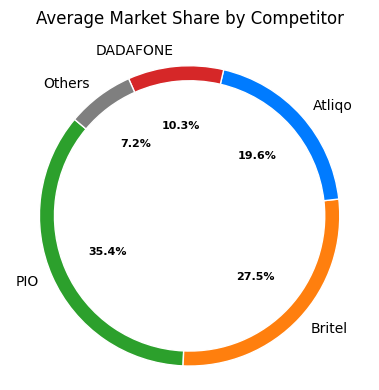

In [24]:
plt.figure(figsize=(4, 4))
brand_colors = {
    'Atliqo': '#007bff',     # Blue
    'Britel': '#ff7f0e',     # Orange
    'DADAFONE': '#d62728',   # Red
    'PIO': '#2ca02c',        # Green
    'Others': '#7f7f7f'      # Gray
}
colors = [brand_colors[company] for company in avg_ms['company']]
wedges, texts, autotexts = plt.pie(
    avg_ms['ms_pct'],
    labels=avg_ms['company'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.1, edgecolor='w')  
)


plt.setp(autotexts, size=8, weight="bold", color='black')
plt.title("Average Market Share by Competitor", fontsize=12 , pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Which Atliqo plans are generating the most revenue overall and by city?

In [25]:
# Merge plan descriptions
plan_revenue = fact_plan_revenue.merge(dim_plan, left_on='plans', right_on='plan')

# Group by plan and sum revenue
total_plan_revenue = plan_revenue.groupby('plan_description')['plan_revenue_crores'].sum().sort_values(ascending=False).reset_index()
total_plan_revenue

,plan_description,plan_revenue_crores
0,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,419.93
1,Super Saviour Pack (1.5 GB / Day Combo For 56 ...,297.53
2,Elite saver Pack (1 GB/ Day) Valid: 28 Days,261.54
3,Mini Data Saver Pack (500 MB/ Day) Valid: 20 Days,195.22
4,Ultra Fast Mega Pack (3GB / Day Combo For 80 d...,185.95
5,Rs. 99 Full Talktime Combo Pack,165.61
6,Xstream Mobile Data Pack: 15GB Data | 28 days,124.37
7,Ultra Duo Data Pack (1.8GB / Day Combo For 55 ...,116.13
8,25 GB Combo 3G / 4G Data Pack,73.80
9,Daily Saviour (1 GB / Day) validity: 1 Day,43.43


<Figure size 1000x400 with 0 Axes>

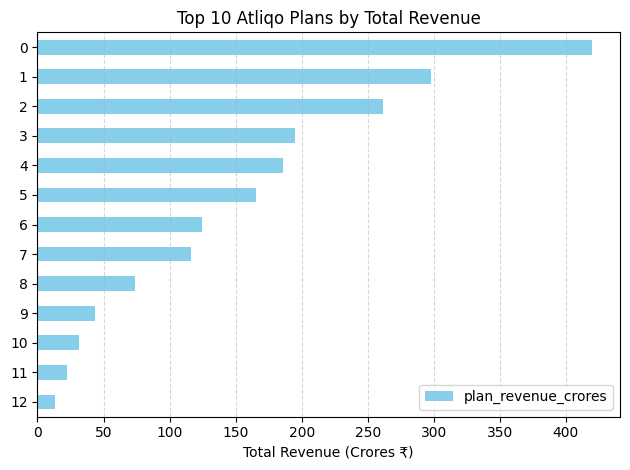

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
total_plan_revenue.plot(kind='barh', color='skyblue')
plt.title("Top 10 Atliqo Plans by Total Revenue")
plt.xlabel("Total Revenue (Crores ₹)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### How does revenue distribution look across city in pre-5G vs post-5G months?

In [29]:
revenue_merged = fact_atliqo_metrics.merge(dim_date[['date', 'before/after_5g']], on='date')
revenue_merged = revenue_merged.merge(dim_cities, on='city_code')


city_revenue_5g = revenue_merged.groupby(['city_name', 'before/after_5g'])['atliqo_revenue_crores'].sum().reset_index()


revenue_pivot = city_revenue_5g.pivot(index='city_name', columns='before/after_5g', values='atliqo_revenue_crores').fillna(0)


print("🏙️ Revenue Distribution by City (Before vs After 5G) in Cr:")
display(revenue_pivot.sort_values('After 5G', ascending=False))


🏙️ Revenue Distribution by City (Before vs After 5G) in Cr:


before/after_5g,After 5G,Before 5G
city_name,,
Mumbai,245.15,244.40
Kolkata,191.84,192.55
Delhi,190.82,196.38
Bangalore,169.94,168.67
Chennai,146.24,150.13
Pune,130.12,129.64
Hyderabad,117.10,118.63
Ahmedabad,92.58,94.49
Jaipur,70.78,70.09


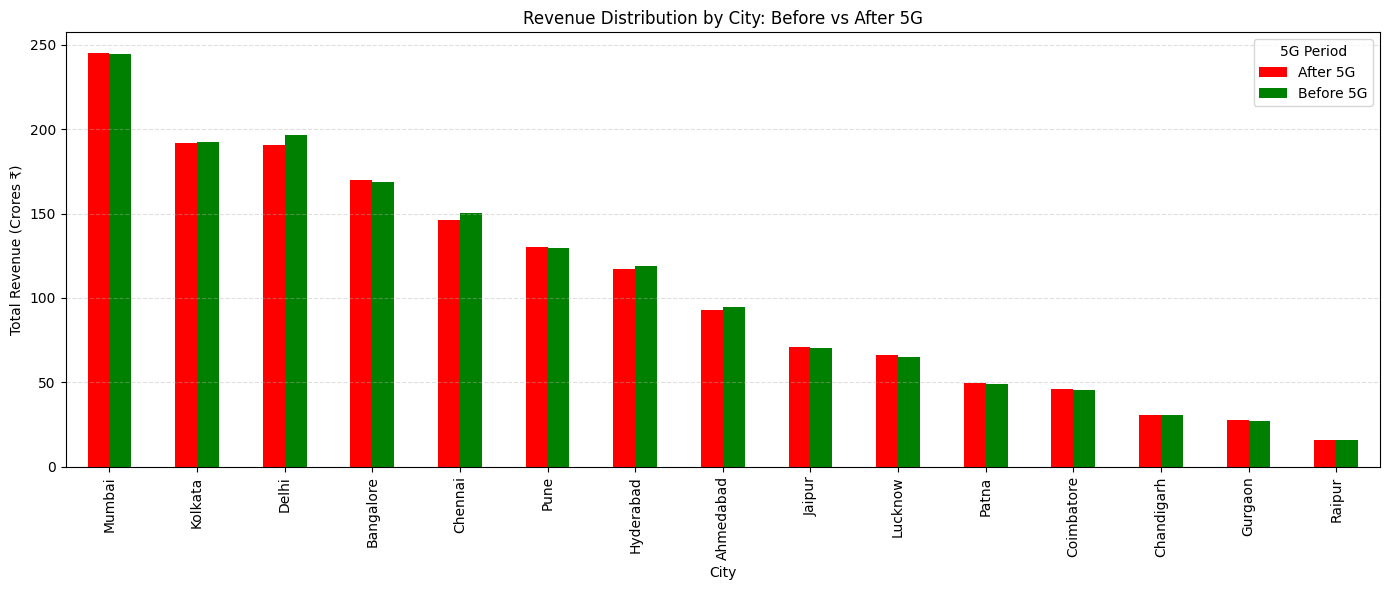

In [38]:
revenue_pivot_sorted = revenue_pivot.sort_values(by='After 5G', ascending=False)

revenue_pivot_sorted.plot(kind='bar', figsize=(14, 6), color=['Red', 'Green'])
plt.title("Revenue Distribution by City: Before vs After 5G")
plt.xlabel("City")
plt.ylabel("Total Revenue (Crores ₹)")
plt.xticks(rotation=90)
plt.legend(title="5G Period")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#### What is Atliqo’s market share trend over time compared to competitors like Britel, DADAFONE, PIO, Others?

In [50]:
monthly_ms = fact_market_share.groupby(['date', 'company'])['ms_pct'].mean().round(2).reset_index()
monthly_ms.pivot(index='date', columns='company', values='ms_pct')

company,Atliqo,Britel,DADAFONE,Others,PIO
date,,,,,
2022-01-01,19.76,28.42,10.24,7.22,34.36
2022-02-01,20.79,27.35,9.87,7.21,34.78
2022-03-01,20.97,26.32,10.16,7.24,35.31
2022-04-01,19.43,26.95,10.61,7.01,36.01
2022-06-01,18.70,28.79,10.38,7.31,34.82
2022-07-01,19.15,27.90,10.08,7.36,35.51
2022-08-01,19.84,26.70,10.31,7.35,35.81
2022-09-01,17.84,27.47,10.81,7.15,36.73


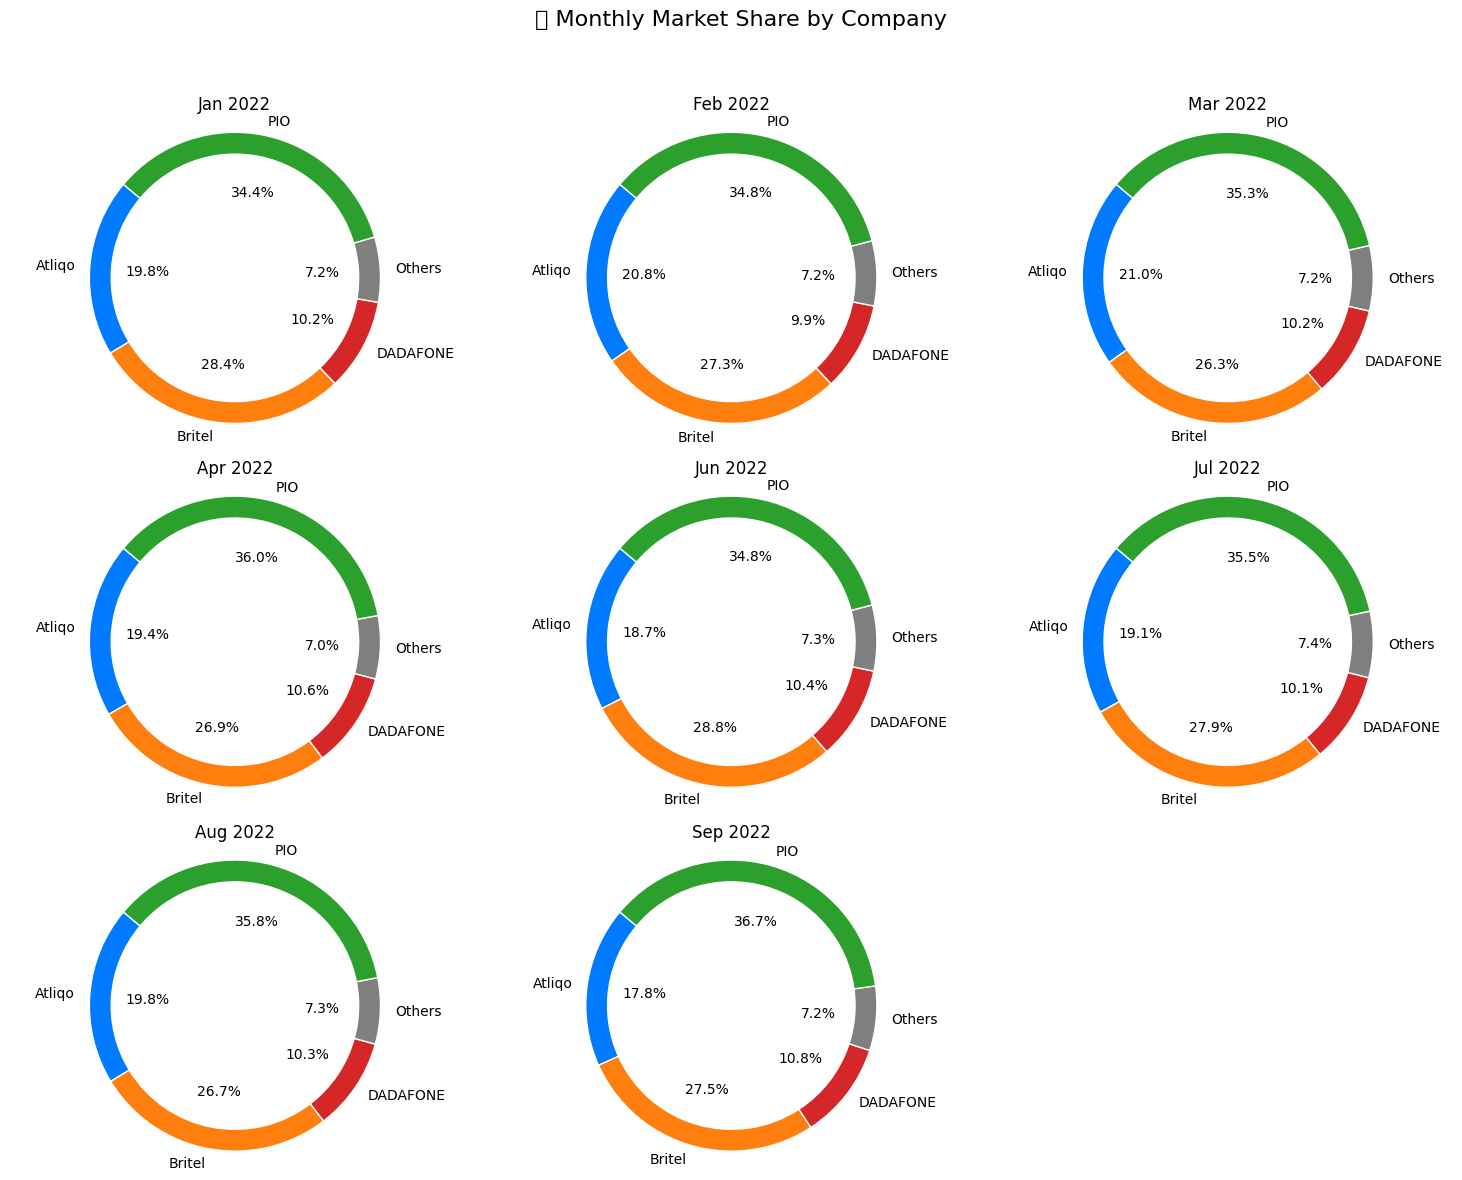

In [51]:
brand_colors = {
    'Atliqo': '#007bff',
    'Britel': '#ff7f0e',
    'DADAFONE': '#d62728',
    'PIO': '#2ca02c',
    'Others': '#7f7f7f'
}

# Step 4: Grid setup (3 rows x 3 cols for 9 months)
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten for easy looping

# Step 5: Plot each pie chart
for i, date in enumerate(unique_dates):
    ax = axes[i]
    month_data = monthly_ms[monthly_ms['date'] == date]
    labels = month_data['company']
    sizes = month_data['ms_pct']
    colors = [brand_colors[c] for c in labels]

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops=dict(width=0.15, edgecolor='white')
    )
    
    ax.set_title(pd.to_datetime(date).strftime('%b %Y'), fontsize=12)
    ax.axis('equal')

# Step 6: Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("📊 Monthly Market Share by Company", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Reserve space for suptitle
plt.show()

#### Which cities prefer high-value plans vs budget plans?